In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [74]:
def new_figure () :
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_xlim3d(50,80)
    ax.set_ylim3d(80, 180)
    ax.set_zlim3d(0, 180) 
    ax.view_init(0, -35)
    #ax.view_init(50, -35)
    #ax.set_axis_off()
    return   fig, ax

def data_to_df (data, temps) :
    l=data.shape[1]-5
    datax=[]; datay=[]; dataz=[]
    for i in range (0,l,3):
        datax.append(data.loc[:,data.columns[i]][temps])  #extract all the x's from the first column and store them in datax list
        datay.append(data.loc[:,data.columns[i+1]][temps])  #extract all the y's from the first column and store them in datay list
        dataz.append(data.loc[:,data.columns[i+2]][temps])  #extract all the z's from the first column and store them in dataz list
    ar=np.array([datax,datay,dataz])
    df = pd.DataFrame(ar, index = ['x', 'y', 'z'])
    return df

def plot_all_sensors_with_names (data,ax):
    nb_sensors = len(data.columns)-5
    for i in range (0,nb_sensors):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        y=data.loc[:,sensor_name][1]
        z=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=200, marker='d', color="g")
        ax.text(x,y,z,'%s' % (sensor_name), size=20, zorder=1,)

def plot_all_sensors_with_numbers (data,ax):
    nb_sensors = len(data.columns)
    for i in range (0,nb_sensors):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        z=data.loc[:,sensor_name][1]
        y=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=20, marker='d', color="g")
        ax.text(x,y,z, '%s''%s' % ('  ',i+1), size=5, zorder=1,)

def muscle_groups (data,ax):
    for i in range (51,54):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        y=data.loc[:,sensor_name][1]
        z=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=20, marker='d', color="g")
        ax.text(x,y,z, '%s''%s' % ('  ',i+1), size=5, zorder=1,)

def plot_all_segments(data,ax) :
    for i in range (0,len(segments_right)) :
        ax.plot(data.loc[:,segments_right[i]].loc['x',:],data.loc[:,segments_right[i]].loc['z',:],data.loc[:,segments_right[i]].loc['y',:], color="b")
    for i in range (0,len(segments_left)) :
        ax.plot(data.loc[:,segments_left[i]].loc['x',:],data.loc[:,segments_left[i]].loc['z',:],data.loc[:,segments_left[i]].loc['y',:], color="r")
    for i in range (0,len(segments_axial)) :
        ax.plot(data.loc[:,segments_axial[i]].loc['x',:],data.loc[:,segments_axial[i]].loc['z',:],data.loc[:,segments_axial[i]].loc['y',:], color="k")



def plot_head (data,ax,temps) :
    x_head = data.loc[:,12][temps]
    y_head = data.loc[:,14][temps]
    z_head = data.loc[:,13][temps]
    ax.scatter(x_head,y_head,z_head,s=400, marker='o', color="k")



def animate(i):
    print(i)
    df= data_to_df (data, i*2)
    ax=new_figure()
    plot_all_sensors_with_numbers(df,ax)
    plot_all_segments(df,ax)
    ax.view_init(10,5)
    plot_head (data,ax,i*2)
    #


In [61]:
data = pd.read_csv ('P33__0_650.txt', delimiter="\t" , header=None)
print(data)

                                                    0
0   7.254981994628906250e+01,7.255319976806640625e...
1   1.050532836914062500e+02,1.050536575317382812e...
2   1.256610107421875000e+02,1.256600036621093750e...
3   7.401336669921875000e+01,7.401612854003906250e...
4   1.389515991210937500e+02,1.389519195556640625e...
5   1.239688949584960938e+02,1.239665222167968750e...
6   7.119616699218750000e+01,7.120608520507812500e...
7   1.670965118408203125e+02,1.670979766845703125e...
8   1.239804000854492188e+02,1.239797134399414062e...
9   7.319783782958984375e+01,7.320040130615234375e...
10  1.552014007568359375e+02,1.552017211914062500e...
11  1.234819335937500000e+02,1.234793319702148438e...
12  7.209999084472656250e+01,7.211645507812500000e...
13  1.800647583007812500e+02,1.800657196044921875e...
14  1.236207275390625000e+02,1.236179580688476562e...
15  7.671589660644531250e+01,7.672332000732421875e...
16  1.530676574707031250e+02,1.530655670166015625e...
17  1.416226959228515625e+02

In [62]:
data.shape

(56, 1)

In [63]:
dt= pd.DataFrame (data)
dt

,0
0,"7.254981994628906250e+01,7.255319976806640625e..."
1,"1.050532836914062500e+02,1.050536575317382812e..."
2,"1.256610107421875000e+02,1.256600036621093750e..."
3,"7.401336669921875000e+01,7.401612854003906250e..."
4,"1.389515991210937500e+02,1.389519195556640625e..."
5,"1.239688949584960938e+02,1.239665222167968750e..."
6,"7.119616699218750000e+01,7.120608520507812500e..."
7,"1.670965118408203125e+02,1.670979766845703125e..."
8,"1.239804000854492188e+02,1.239797134399414062e..."
9,"7.319783782958984375e+01,7.320040130615234375e..."


In [64]:
data = pd.read_csv ('P33__0_650.txt', delimiter=",", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,72.549820,72.553200,72.553001,72.552422,72.552902,72.549576,72.538773,72.531548,72.526222,72.520615,...,72.815826,72.824417,72.828705,72.841553,72.850166,72.859528,72.864342,72.878860,72.889931,72.902122
1,105.053284,105.053658,105.053596,105.053307,105.052628,105.050980,105.047035,105.043663,105.041328,105.035332,...,104.927742,104.929001,104.929619,104.931480,104.932724,104.934059,104.934746,104.936790,104.938690,104.939865
2,125.661011,125.660004,125.659470,125.656448,125.650429,125.629646,125.601395,125.587807,125.574570,125.553177,...,124.257385,124.265144,124.269012,124.280556,124.288246,124.296455,124.300667,124.313972,124.330528,124.339340
3,74.013367,74.016129,74.015930,74.015350,74.015831,74.012505,74.001701,73.994476,73.989151,73.983543,...,74.092667,74.101257,74.105553,74.118393,74.127007,74.136368,74.141190,74.155701,74.166779,74.178963
4,138.951599,138.951920,138.951874,138.951584,138.950897,138.949249,138.945312,138.941940,138.939606,138.933609,...,138.834351,138.835617,138.836227,138.838089,138.839340,138.840668,138.841354,138.843399,138.845306,138.846481
5,123.968895,123.966522,123.965996,123.962967,123.956955,123.936172,123.907913,123.894333,123.881096,123.859703,...,122.580399,122.588165,122.592026,122.603569,122.611259,122.619469,122.623680,122.636986,122.653542,122.662354
6,71.196167,71.206085,71.211288,71.216354,71.219276,71.222038,71.215050,71.211388,71.207802,71.207451,...,71.175102,71.183693,71.187988,71.200829,71.209442,71.218803,71.223625,71.238136,71.249214,71.261398
7,167.096512,167.097977,167.098785,167.099396,167.099152,167.098648,167.095428,167.092712,167.090714,167.085693,...,166.970520,166.971786,166.972397,166.974258,166.975510,166.976837,166.977524,166.979568,166.981476,166.982651
8,123.980400,123.979713,123.980125,123.977745,123.971344,123.947403,123.917068,123.901543,123.887352,123.863098,...,122.675522,122.683281,122.687149,122.698685,122.706383,122.714584,122.718803,122.732109,122.748665,122.757469
9,73.197838,73.200401,73.200203,73.199631,73.200111,73.196777,73.185974,73.178757,73.173431,73.167816,...,73.192276,73.200867,73.205154,73.218002,73.226616,73.235977,73.240791,73.255310,73.266380,73.278572


In [65]:
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,72.549820,105.053284,125.661011,74.013367,138.951599,123.968895,71.196167,167.096512,123.980400,73.197838,...,60.604649,118.281845,74.297119,17.803215,118.778236,0.011987,0.015057,0.018641,0.018705,0.0
1,72.553200,105.053658,125.660004,74.016129,138.951920,123.966522,71.206085,167.097977,123.979713,73.200401,...,60.604698,118.281540,74.297432,17.803265,118.777931,0.018528,0.020522,0.016598,0.027110,0.0
2,72.553001,105.053596,125.659470,74.015930,138.951874,123.965996,71.211288,167.098785,123.980125,73.200203,...,60.604641,118.281006,74.297302,17.803221,118.777802,0.002703,0.023332,0.028724,0.014473,0.0
3,72.552422,105.053307,125.656448,74.015350,138.951584,123.962967,71.216354,167.099396,123.977745,73.199631,...,60.604382,118.278252,74.296936,17.803020,118.776855,0.004101,0.022582,0.021781,0.018533,0.0
4,72.552902,105.052628,125.650429,74.015831,138.950897,123.956955,71.219276,167.099152,123.971344,73.200111,...,60.603848,118.273102,74.296661,17.802591,118.774895,0.005191,0.008682,0.027340,0.017761,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,72.859528,104.934059,124.296455,74.136368,138.840668,122.619469,71.218803,166.976837,122.714584,73.235977,...,60.560867,117.644051,74.323555,17.753601,118.651512,0.026594,0.023855,0.019223,0.015066,0.0
176,72.864342,104.934746,124.300667,74.141190,138.841354,122.623680,71.223625,166.977524,122.718803,73.240791,...,60.561554,117.648270,74.323776,17.753597,118.651733,0.017228,0.030861,0.018582,0.012344,0.0
177,72.878860,104.936790,124.313972,74.155701,138.843399,122.636986,71.238136,166.979568,122.732109,73.255310,...,60.563381,117.659431,74.323990,17.753370,118.652161,0.025732,0.011929,0.008105,0.016813,0.0
178,72.889931,104.938690,124.330528,74.166779,138.845306,122.653542,71.249214,166.981476,122.748665,73.266380,...,60.564392,117.667183,74.324127,17.753027,118.653191,0.032046,0.015726,0.023688,0.009806,0.0


In [66]:
segments_right=np.array([[3,5],[5,6],[6,7],[0,11],[11,12],[12,13]])
segments_left=np.array([[3,8],[8,9],[9,10],[0,14],[14,15],[15,16]])
segments_axial=np.array([[4, 2],[2,3],[3,1],[1,0]])

In [67]:
print('segments_right :')
print(segments_right)
print('\nsegments_left :')
print(segments_left)
print('\nsegments_axial :')
print(segments_axial)

segments_right :
[[ 3  5]
 [ 5  6]
 [ 6  7]
 [ 0 11]
 [11 12]
 [12 13]]

segments_left :
[[ 3  8]
 [ 8  9]
 [ 9 10]
 [ 0 14]
 [14 15]
 [15 16]]

segments_axial :
[[4 2]
 [2 3]
 [3 1]
 [1 0]]


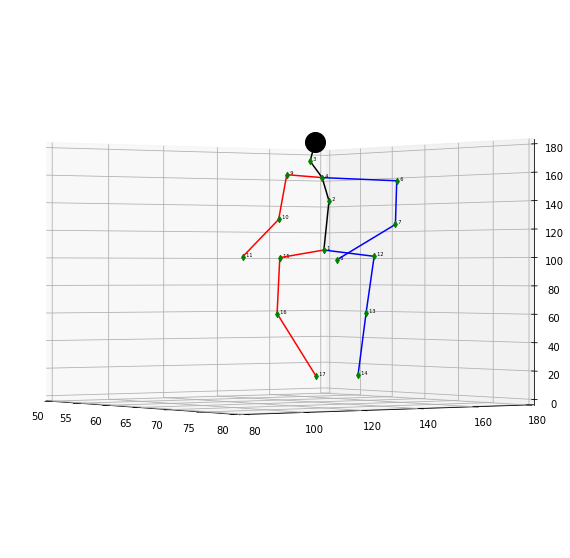

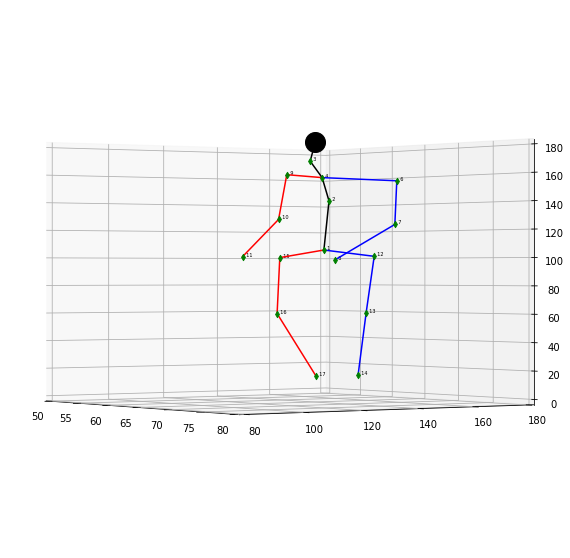

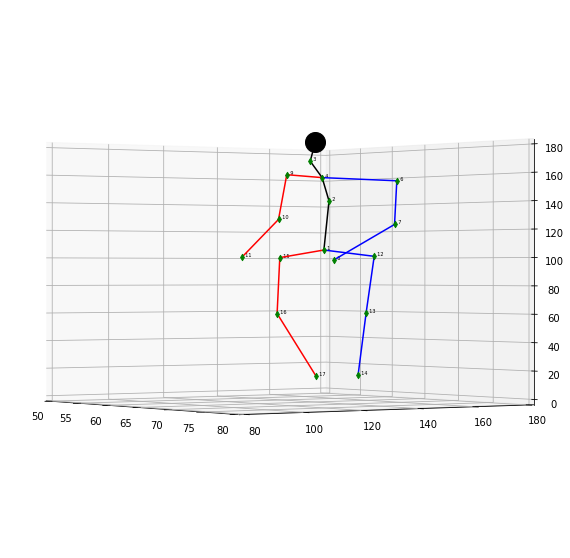

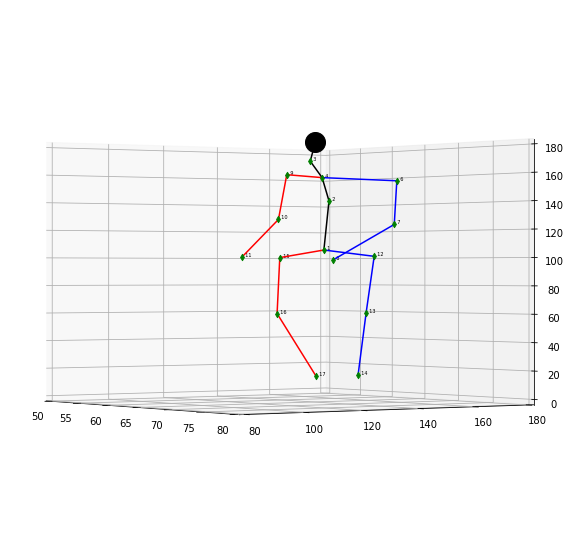

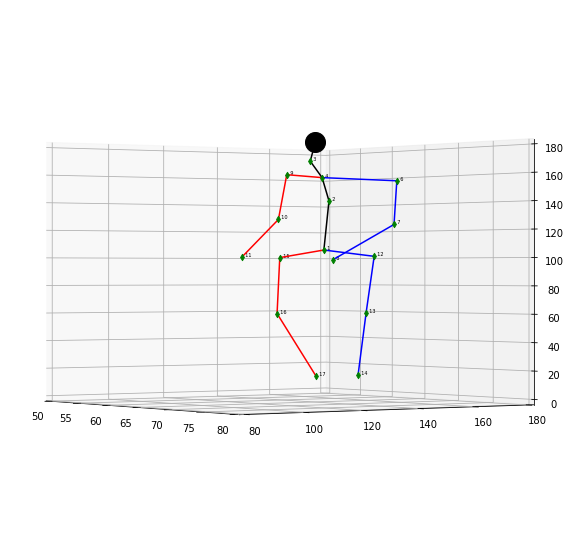

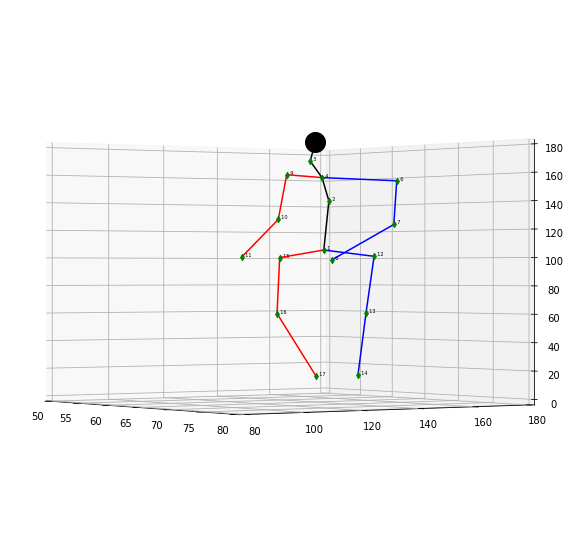

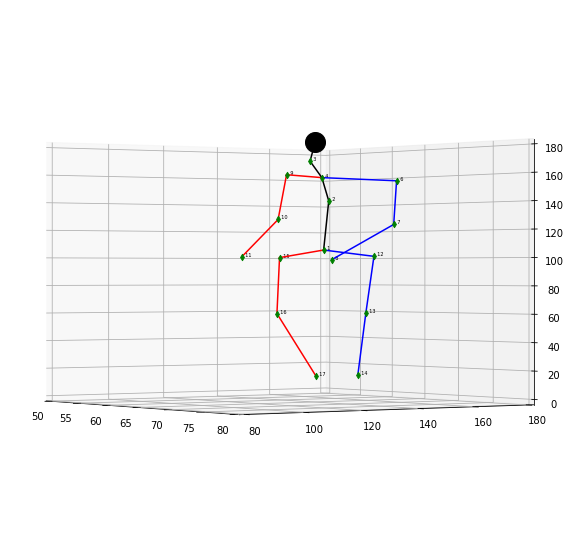

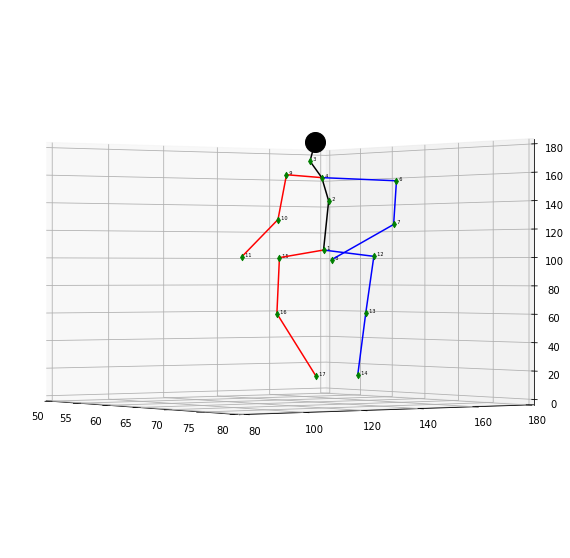

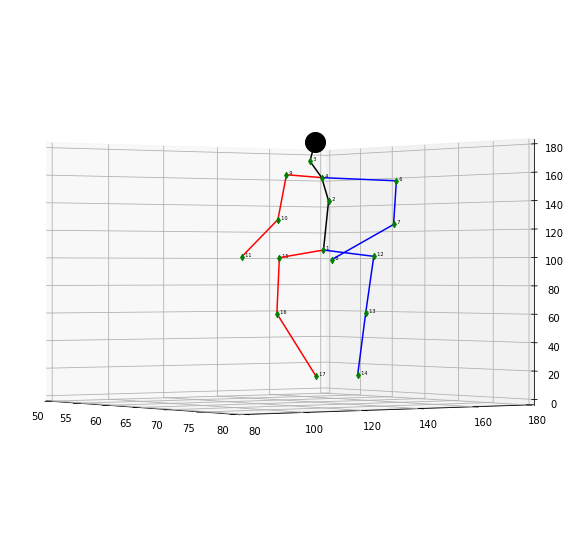

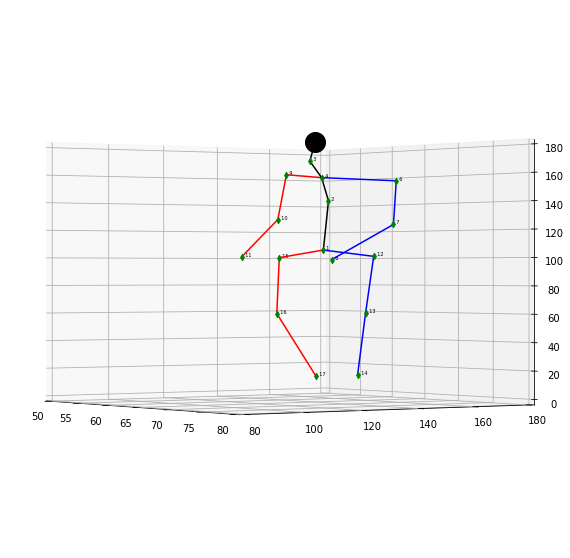

In [75]:
l=data.shape[0]
for i in range (10) :
    df= data_to_df (data, i)
    fig, ax = new_figure()
    plot_all_sensors_with_numbers(df,ax)
    plot_all_segments(df,ax)
    #ax.view_init(0,20)
    plot_head (data,ax,i)
    #s= str (i)
    #fig.savefig(s,dpi=500)

In [76]:

writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)


fig = plt.figure(figsize=(10,10))


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=int(data.shape[0]/10), repeat=True)



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>